# Mathematik für Biologiestudierende

Wintersemester 2025/26

13.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen heute

*

In [3]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Multiples Testen

### Beispiel Gummibärchen

<img src="bilder/signi1.png" alt="Cartoon von xkcd" width="75%"/>


&copy; xkcd.com

<img src="bilder/signi2.png" alt="Cartoon von xkcd" width="75%"/>

<img src="bilder/signi3.png" alt="Cartoon von xkcd" width="75%"/>

<img src="bilder/signi4.png" alt="Cartoon von xkcd" width="75%"/>

* Ein Fall von Data Snooping
* Bei einem Signifikanztest zum Nivea $\alpha=0.05$ wird in 5% der Fälle die Nullhypothese fälschlich abgelehnt
* In dem Beispiel des Cartoons gibt es 20 Experimente; es ist zu erwarten, dass in einem Fall die Nullhypothese zu unrecht abgelehnt wird

* wenn wir gemäß Bonferroni korrigieren, dann müssen wir jeden einzelnen Test zum Signifikanzniveau $\frac\alpha{20}$ durchführen

* alternativ wiederholt man das Experiment mit grünen Gummibärchen

# ANOVA

* Mit einer ANOVA wird auf Unterschiede zwischen Gruppen getestet

# Post-hoc Analyse

* Wenn die ANOVA einen signifikanten Unterschied zwischen den Gruppen gezeigt hat, dann versucht man mit der post-hoc Analyse herauszubekommen, zwischen welchen einzelnen Gruppen signifikante Unterschiede bestehen
* Die post-hoc Analyse muss für multiple Vergleiche korrigiert werden

### Beispiel Zitronen

In [5]:
zitronen = pd.read_csv("http://reh.math.uni-duesseldorf.de/~braun/bio2425/zitronen.csv")

In [6]:
zitronen.head()

,Vitamin_C_Gehalt,Land
0,494.5,Spanien
1,499.2,Spanien
2,494.3,Spanien
3,478.0,Spanien
4,500.1,Spanien


Die Tabelle (mit erfundenen Daten) zeigt den Vitamin C Gehalt in [mg] pro [kg] von Zitronen aus verschiedenen Ländern

In [7]:
zitronen.Land.value_counts()

Land
Spanien         8
Italien         8
Griechenland    8
Marokko         8
Indien          8
Name: count, dtype: int64

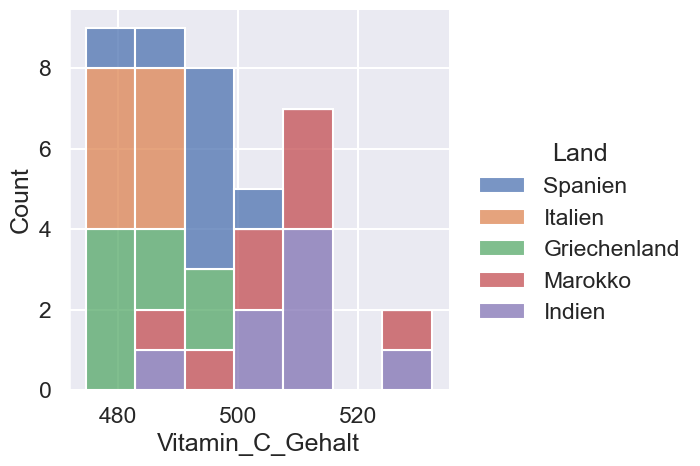

In [8]:
sns.displot(zitronen, x='Vitamin_C_Gehalt', hue='Land', multiple='stack');

In [9]:
spanien = zitronen[zitronen.Land=='Spanien'].Vitamin_C_Gehalt
italien = zitronen[zitronen.Land=='Italien'].Vitamin_C_Gehalt
griechenland = zitronen[zitronen.Land=='Griechenland'].Vitamin_C_Gehalt
marokko = zitronen[zitronen.Land=='Marokko'].Vitamin_C_Gehalt
indien = zitronen[zitronen.Land=='Indien'].Vitamin_C_Gehalt

In [10]:
stats.f_oneway(spanien, italien, griechenland, marokko, indien)

F_onewayResult(statistic=11.873757820342002, pvalue=3.3733416696757513e-06)

## Paarvergleiche

In [11]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [12]:
muc = MultiComparison(zitronen.Vitamin_C_Gehalt, zitronen.Land)

In [13]:
res = muc.allpairtest(stats.ttest_ind, method='bonferroni')
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0021,True
Griechenland,Italien,1.113,0.2845,1.0,False
Griechenland,Marokko,-3.5339,0.0033,0.0331,True
Griechenland,Spanien,-1.9478,0.0718,0.7178,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,1.0,False
Indien,Spanien,3.3226,0.005,0.0503,False
Italien,Marokko,-4.3312,0.0007,0.0069,True
Italien,Spanien,-3.3042,0.0052,0.0522,False
Marokko,Spanien,2.2786,0.0389,0.389,False


Nur vier der Paarvergleiche sind signifikant, wenn Bonferroni korrigiert wird

Dasselbe mit Bonferroni-Holm

In [14]:
res = muc.allpairtest(stats.ttest_ind, method='holm')
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0019,True
Griechenland,Italien,1.113,0.2845,0.5689,False
Griechenland,Marokko,-3.5339,0.0033,0.0231,True
Griechenland,Spanien,-1.9478,0.0718,0.2153,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,0.7549,False
Indien,Spanien,3.3226,0.005,0.0302,True
Italien,Marokko,-4.3312,0.0007,0.0055,True
Italien,Spanien,-3.3042,0.0052,0.0302,True
Marokko,Spanien,2.2786,0.0389,0.1556,False


* Wenn Bonferroni-Holm korrigiert wird, dann sind sechs der Paarvergleiche signifikant

## Ablesung genauerer Werte

* Woher weiss ich die genauen *p*-Werte?
* `res = muc.allpairtest(stats.ttest_ind)`, dann ist `res` eine Liste (genauer: ein Tupel) mit zwei Einträgen
* `res[0]` ist die leserfreundlich formatierte Tabelle
* die genauen Werte stehen in `res[1]`

In [15]:
res[1] 

(array([[-4.95235073e+00,  2.12516086e-04],
        [ 1.11298427e+00,  2.84460819e-01],
        [-3.53387275e+00,  3.30511610e-03],
        [-1.94781061e+00,  7.17760991e-02],
        [ 6.20082296e+00,  2.31091193e-05],
        [ 3.18345880e-01,  7.54921930e-01],
        [ 3.32261512e+00,  5.03074269e-03],
        [-4.33123161e+00,  6.90566981e-04],
        [-3.30423221e+00,  5.21815835e-03],
        [ 2.27858634e+00,  3.88961763e-02]]),
 array([ True, False,  True, False,  True, False,  True,  True,  True,
        False]),
 array([1.91264477e-03, 5.68921637e-01, 2.31358127e-02, 2.15328297e-01,
        2.31091193e-04, 7.54921930e-01, 3.01844561e-02, 5.52453585e-03,
        3.01844561e-02, 1.55584705e-01]),
 0.005116196891823743,
 0.005)

* Der erste Array ist zweidimensional und enthält die genauen Werte der Statistik und die unkorrigierten *p*-Werte

* für uns wichtig ist der dritte Array, der die korrigierten *p*-Werte in der Reihenfolge enthält in der die Paarvergleiche in der Tabelle aufgeführt sind

In [16]:
p_werte_korrigiert = res[1][2]
p_werte_korrigiert

array([1.91264477e-03, 5.68921637e-01, 2.31358127e-02, 2.15328297e-01,
       2.31091193e-04, 7.54921930e-01, 3.01844561e-02, 5.52453585e-03,
       3.01844561e-02, 1.55584705e-01])

In [17]:
stats.f_oneway(spanien, italien, griechenland, marokko, indien).pvalue

3.3733416696757513e-06

Der *p*-Wert der ANOVA ist kleiner als 5.0E-6.  Daher ist zu diesem Signifikanzniveau nachgewiesen, dass Zitronen aus verschiedenen Ländern unterschiedliche Vitamin C Gehalte haben.  Wir rechnen die post-hoc Analyse für dieses Signifikanzniveau

In [18]:
res = muc.allpairtest(stats.ttest_ind, alpha=5.0E-6, method='holm')

In [19]:
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0019,False
Griechenland,Italien,1.113,0.2845,0.5689,False
Griechenland,Marokko,-3.5339,0.0033,0.0231,False
Griechenland,Spanien,-1.9478,0.0718,0.2153,False
Indien,Italien,6.2008,0.0,0.0002,False
Indien,Marokko,0.3183,0.7549,0.7549,False
Indien,Spanien,3.3226,0.005,0.0302,False
Italien,Marokko,-4.3312,0.0007,0.0055,False
Italien,Spanien,-3.3042,0.0052,0.0302,False
Marokko,Spanien,2.2786,0.0389,0.1556,False


Keiner der Paarvergleiche ist signifikant.

# Behandlung von NaN

In [20]:
pingus = sns.load_dataset('penguins')
pingus.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Es gibt zwei Möglichkeiten, die `NaN` zu entfernen

* mit `pingus.dropna()` werden alle Zeilen entfernt, bei denen mindestens ein Eintrag fehlt

* mit dem folgenden Verfahren entfernen wir alle Zeilen, für die `body_mass_g` keinen Eintrag besitzt 

In [25]:
pingus_mit_gewichtsangabe = pingus[pingus.body_mass_g.notna()]

In [26]:
pingus_mit_gewichtsangabe.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


zum Vergleich

In [27]:
pingus.dropna().describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [21]:
pingus.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [28]:
g1 = pingus[pingus.island=='Biscoe'].body_mass_g.dropna()
g2 = pingus[pingus.island=='Dream'].body_mass_g.dropna()
g3 = pingus[pingus.island=='Torgersen'].body_mass_g.dropna()

In [29]:
stats.f_oneway(g1, g2, g3)

F_onewayResult(statistic=110.00796506232123, pvalue=1.5151291424015603e-37)

In [30]:
muc = MultiComparison(pingus_mit_gewichtsangabe.body_mass_g, pingus_mit_gewichtsangabe.island)

In [31]:
res = muc.allpairtest(stats.ttest_ind, method='bonferroni')

In [32]:
res[0]

group1,group2,stat,pval,pval_corr,reject
Biscoe,Dream,12.9663,0.0,0.0,True
Biscoe,Torgersen,8.7781,0.0,0.0,True
Dream,Torgersen,0.0924,0.9265,1.0,False
